In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from itertools import chain, combinations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
# Load the data
data = pd.read_csv(r"C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\DL\channel_engage\data\preprocessed_data.csv")

#filter data's bucket column for just the 1 value
#data = data[data['bucket'] == 1]

In [2]:

# Define feature lists
numerical_features = [ 'year', 'month', 'day', 'EMAIL', 'TEXT', 'OUTBOUND']
categorical_features = [col for col in data.columns if col not in numerical_features + [ 'target_channel']] #'interaction_channel' is needed in here while target_channel is the y variable

# Define transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define X and y
X = data.drop(columns=['target_channel'])
print(X.head())
# Use LabelEncoder to encode target_channel
label_encoder = LabelEncoder()
y = data['target_channel']
y_encoded = label_encoder.fit_transform(y)
#print(y_encoded)

# Preprocess the data
X = preprocessor.fit_transform(X)
#print(X)

   month  EMAIL  OUTBOUND  TEXT   dlq_30   dlq_60   dlq_90 exclusion_type  \
0      1      1         1     1  current  current  current       elgiible   
1      2      1         1     1  current  current  current       elgiible   
2      2      1         1     1  current  current  current       elgiible   
3      2      1         1     1  current  current  current       elgiible   
4      2      1         1     1  current  current  current       elgiible   

         roll_30        roll_60        roll_90 segment  bucket  \
0   roll forward   roll forward   roll forward    cure       1   
1  roll backward  roll backward  roll backward    cure       1   
2  roll backward  roll backward  roll backward    cure       1   
3  roll backward  roll backward  roll backward    cure       1   
4   roll forward  roll backward  roll backward    cure       1   

  long_term_risk_score acct_balance_segments tot_delq_balance_segments  \
0              0.4-0.6               100-500                   100

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)




c:\Users\ghadf\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



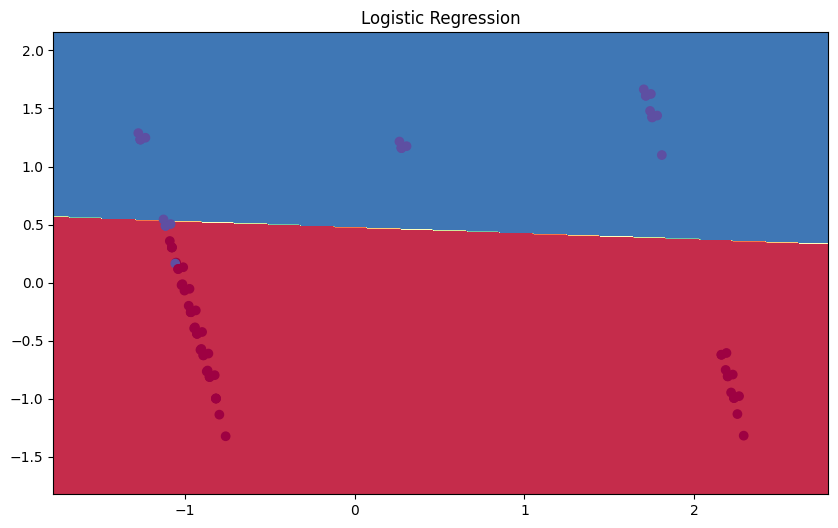

Logistic Regression Accuracy: 0.9000
--------------------------------------------------
Ridge Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



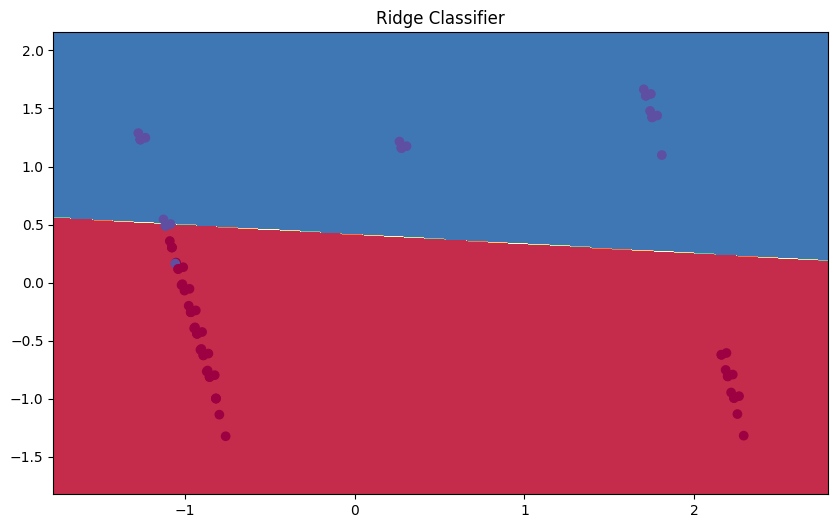

Ridge Classifier Accuracy: 0.9000
--------------------------------------------------
SGD Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



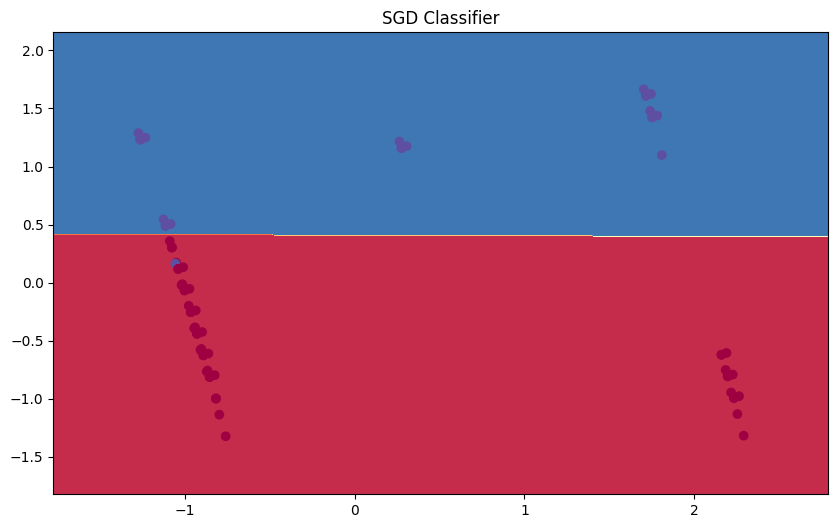

SGD Classifier Accuracy: 0.9500
--------------------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



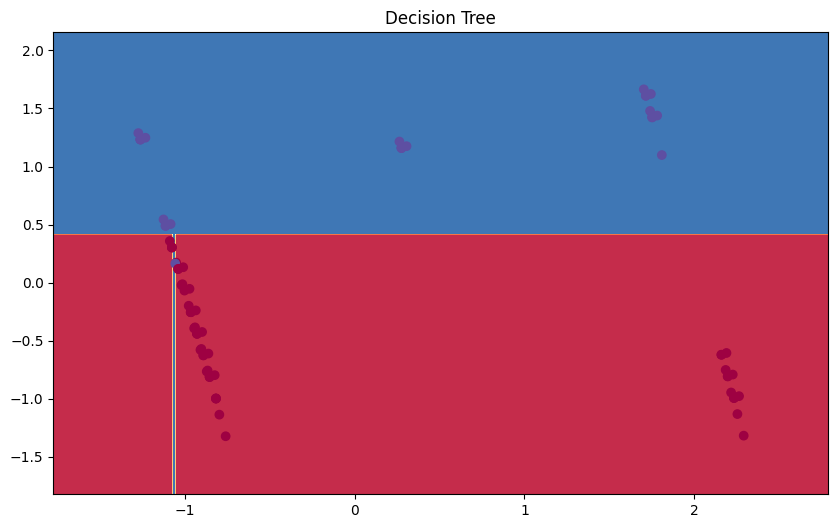

Decision Tree Accuracy: 0.9500
--------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



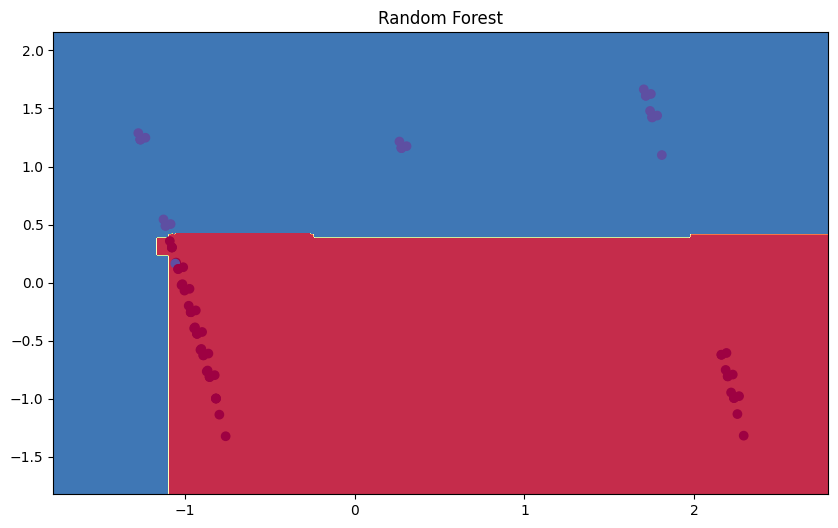

Random Forest Accuracy: 0.9500
--------------------------------------------------
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



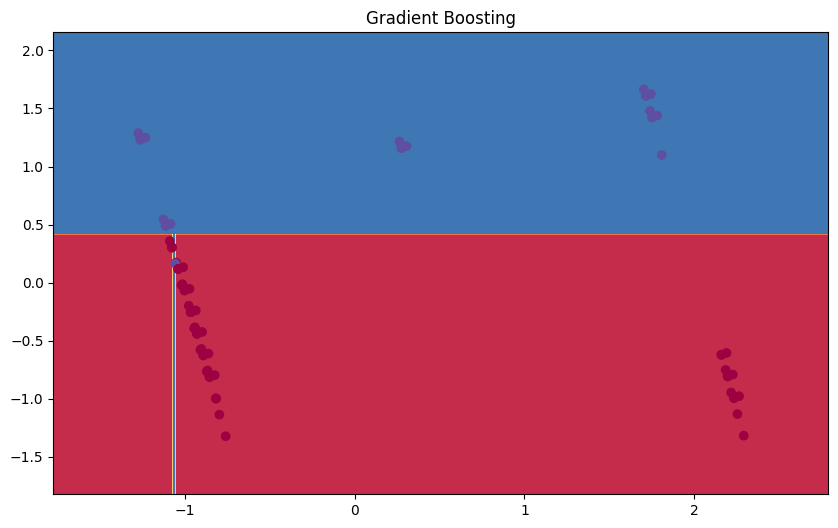

Gradient Boosting Accuracy: 0.9500
--------------------------------------------------
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



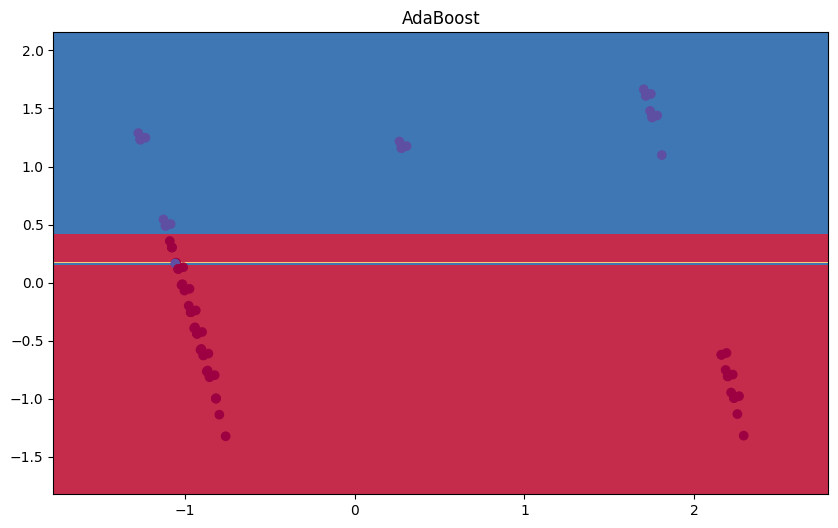

AdaBoost Accuracy: 0.9500
--------------------------------------------------
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.71      0.83         7

    accuracy                           0.90        20
   macro avg       0.93      0.86      0.88        20
weighted avg       0.91      0.90      0.90        20



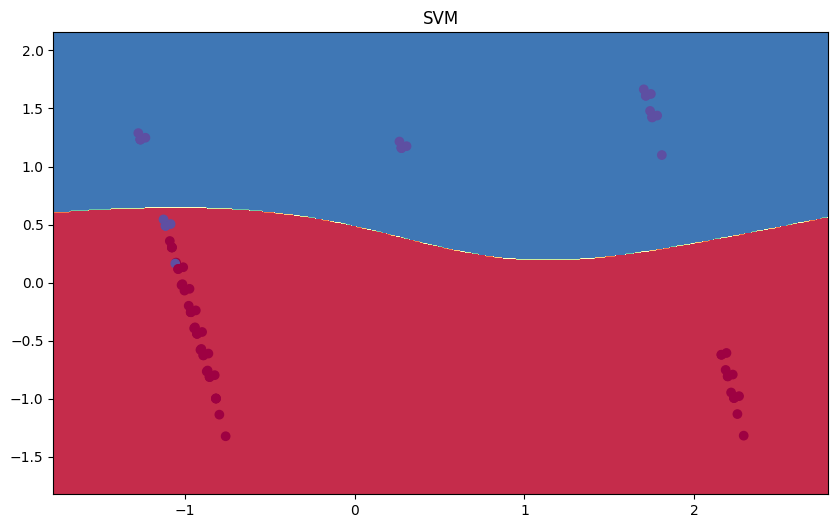

SVM Accuracy: 0.9000
--------------------------------------------------
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



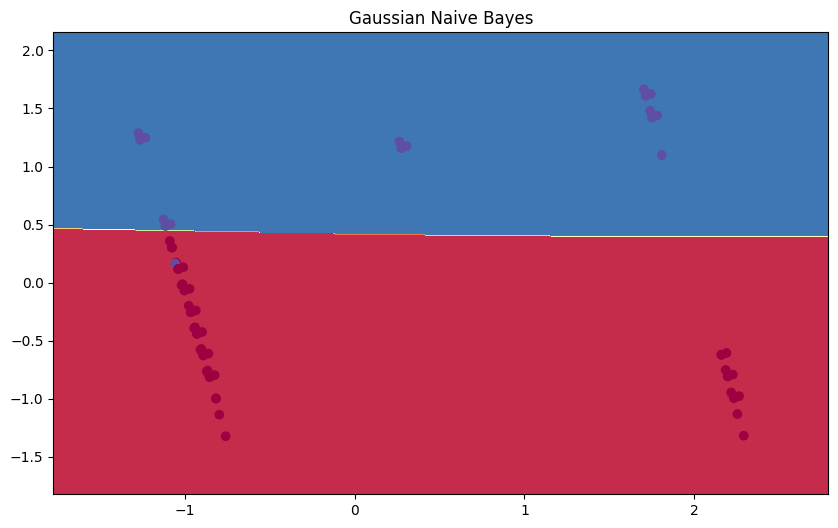

Gaussian Naive Bayes Accuracy: 0.9500
--------------------------------------------------
K-Neighbors Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



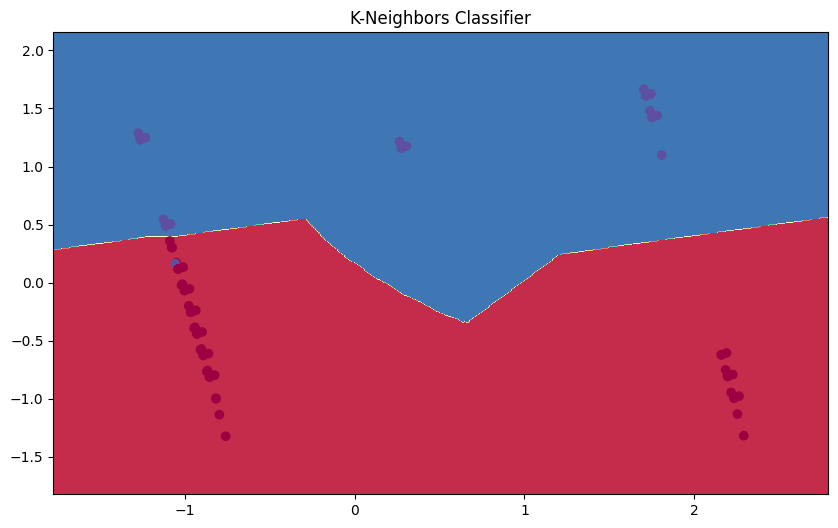

K-Neighbors Classifier Accuracy: 0.9500
--------------------------------------------------
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



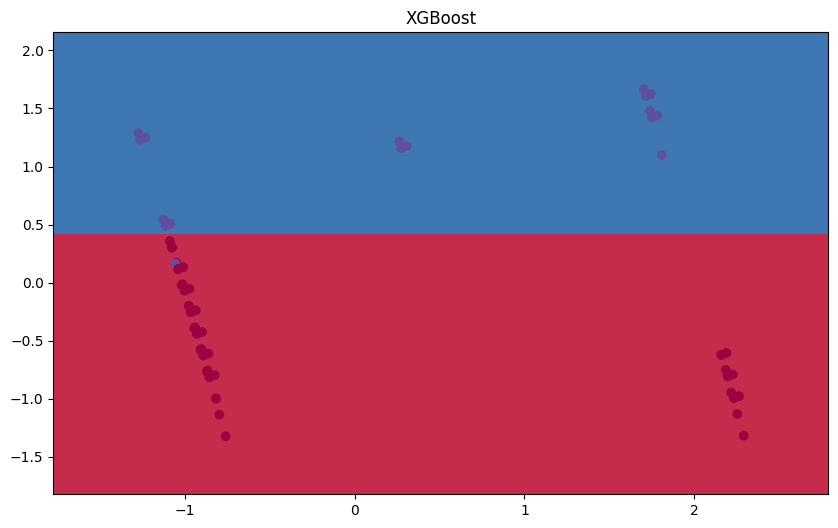

XGBoost Accuracy: 0.9500
--------------------------------------------------
MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



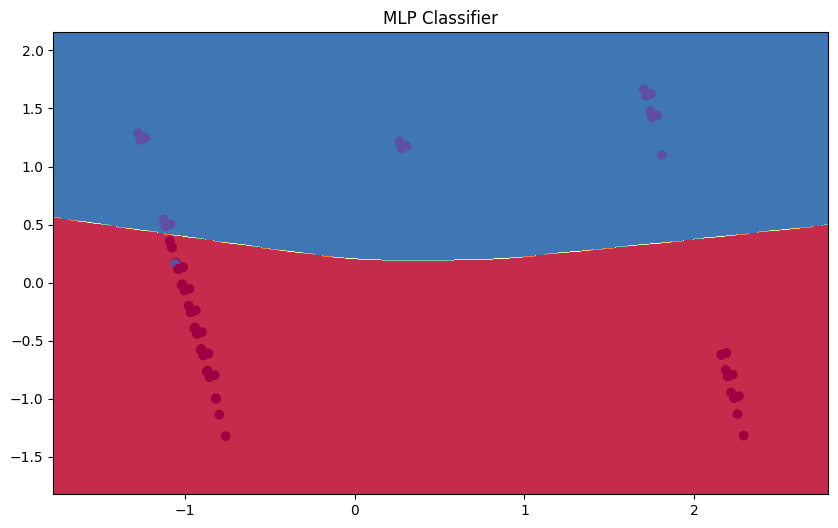

MLP Classifier Accuracy: 0.9500
--------------------------------------------------


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Note: Some models have hyperparameters set to avoid potential issues. 
# You should adjust these based on understanding and dataset specifics.

models = [
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Ridge Classifier", RidgeClassifier()), 
    ("SGD Classifier", SGDClassifier(max_iter=1000, tol=1e-3)),
    ("Decision Tree", DecisionTreeClassifier()), 
    ("Random Forest", RandomForestClassifier()), 
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")), # specific settings for avoiding warnings in recent versions of XGBoost
    ("MLP Classifier", MLPClassifier(max_iter=1000))
]

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


# Train models and plot decision boundaries
results = []
for name, model in models:
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"{name} Classification Report:")
    print(report)
    
    # Plot decision boundaries
    plt.figure(figsize=(10,6))
    plot_decision_boundary(lambda x: model.predict(x), X_train_pca, y_train)
    plt.title(name)
    plt.show()
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("--------------------------------------------------")

